In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns       
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.utils import resample,shuffle
from sklearn.preprocessing import LabelEncoder


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import glob
csv_list1 = glob.glob('/kaggle/input/**/*')
csv_list1

[]

In [2]:
df=pd.read_csv('./train.csv')

In [3]:
data=pd.read_csv(csv_list1[0])
data.head()

IndexError: list index out of range

In [18]:
columns=['Product Name','Destination']

In [19]:

csv_list = os.path.join(dirname, filename)
csv_list

'/kaggle/input/travelinsurancetestdata/test.csv'

In [20]:
df=pd.read_csv(csv_list1[0])

In [3]:
test_data=pd.read_csv('./test.csv')

In [42]:
test_data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [7]:
df.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


C:\Users\91900\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


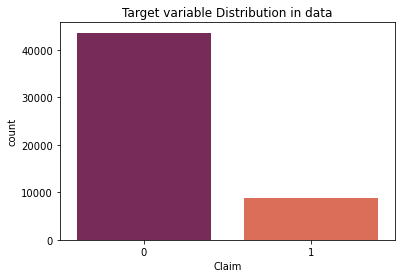

In [8]:
sns.countplot(df['Claim'],palette='rocket')
plt.title("Target variable Distribution in data");

*** Target data is highly imbalanced.

In [9]:
df['Claim'].value_counts(normalize = True).round(2)

0    0.83
1    0.17
Name: Claim, dtype: float64

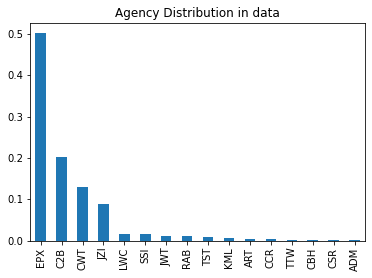

In [11]:
df['Agency'].value_counts(normalize = True).plot(kind = 'bar')

plt.title("Agency Distribution in data")

plt.show()

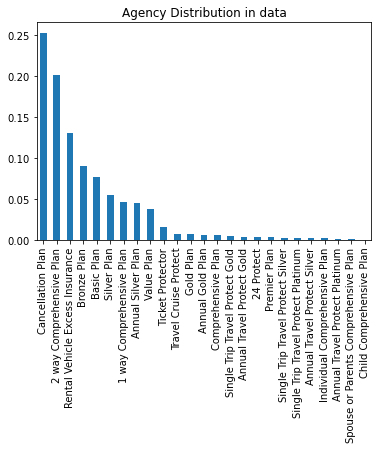

In [12]:
df['Product Name'].value_counts(normalize = True).plot(kind = 'bar')

plt.title("Agency Distribution in data")

plt.show()

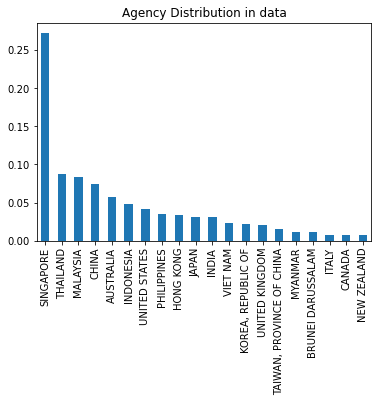

In [13]:
df['Destination'].value_counts(normalize = True)[:20].plot(kind = 'bar')

plt.title("Agency Distribution in data")

plt.show()

Insurance get approved wrt Product Name

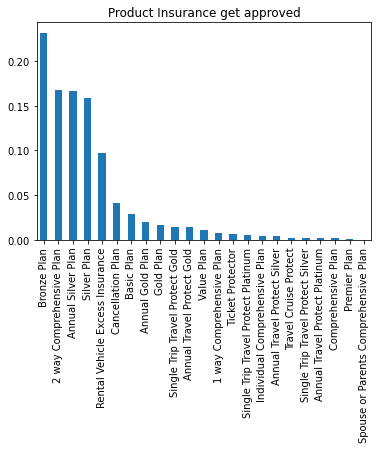

In [14]:
ClaimApproved_ProductName = df[df['Claim'] == 1]

ClaimApproved_ProductName['Product Name'].value_counts(normalize = True).plot(kind = 'bar')

plt.title("Product Insurance get approved")

plt.show()

Insurance get approved wrt Destination

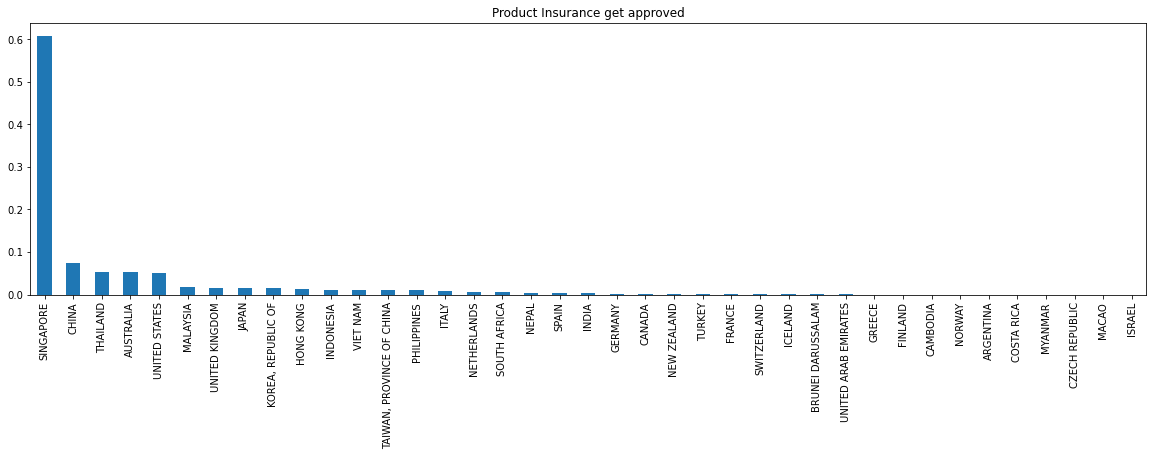

In [15]:
ClaimApproved_Destination = df[df['Claim'] == 1]

ClaimApproved_ProductName['Destination'].value_counts(normalize = True).plot(kind = 'bar',figsize=(20,5))

plt.title("Product Insurance get approved")

plt.show()

In [16]:
ClaimApproved_ProductName['Age'].sort_index(axis = 0,ascending=False).value_counts(normalize = True)

36     0.152752
30     0.054243
31     0.050803
28     0.046445
29     0.041858
         ...   
92     0.000115
108    0.000115
85     0.000115
94     0.000115
83     0.000115
Name: Age, Length: 80, dtype: float64

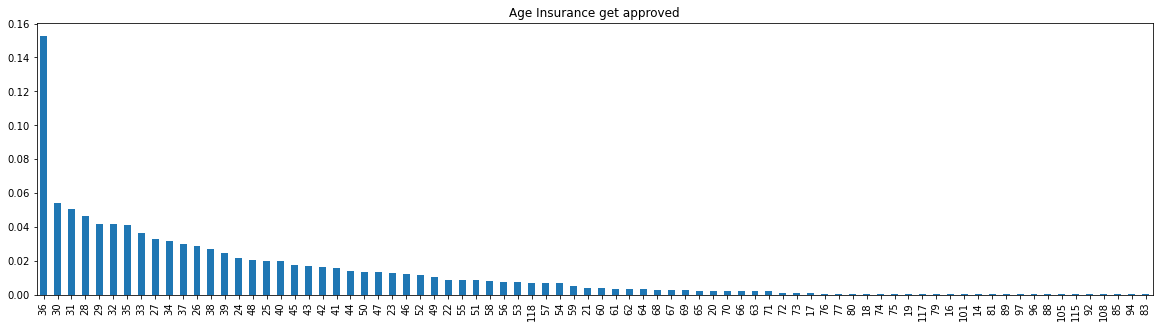

In [17]:
ClaimApproved_Destination = df[df['Claim'] == 1]

ClaimApproved_ProductName['Age'].value_counts(normalize = True).plot(kind = 'bar',figsize=(20,5))

plt.title("Age Insurance get approved")

plt.show()

<AxesSubplot:>

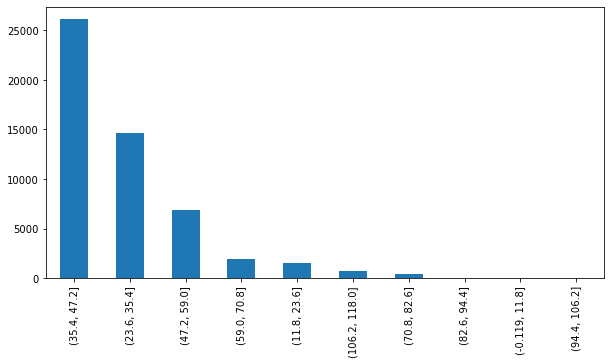

In [18]:
df['Age'].value_counts(bins=10).plot(kind ='bar',figsize=(10,5))

In [3]:
df.loc[df['Duration'] < 0, 'Duration'] = 58.256108

In [24]:
indexs= list(df[df['Duration'].ge(545)].index)
indexs

[382, 2609, 3469, 7766, 14544, 22123, 31985, 33701, 43158, 47724, 47791, 48880]

In [25]:
df[df['Duration'].ge(545)]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
382,9512,SSI,Airlines,Online,Ticket Protector,4736.0,SINGAPORE,0.32,0.09,48,0
2609,4476,C2B,Airlines,Online,Annual Silver Plan,740.0,SINGAPORE,0.00,54.19,36,0
3469,5446,C2B,Airlines,Online,Annual Silver Plan,547.0,SINGAPORE,252.85,63.21,33,0
7766,4113,SSI,Airlines,Online,Ticket Protector,4831.0,SINGAPORE,0.32,0.09,48,0
14544,3927,SSI,Airlines,Online,Ticket Protector,4847.0,SINGAPORE,0.32,0.09,48,0
22123,3165,SSI,Airlines,Online,Ticket Protector,4844.0,SINGAPORE,0.32,0.09,48,0
31985,5697,SSI,Airlines,Online,Ticket Protector,4815.0,SINGAPORE,0.32,0.09,48,0
33701,6734,SSI,Airlines,Online,Ticket Protector,4580.0,SINGAPORE,0.32,0.09,48,0
43158,5331,SSI,Airlines,Online,Ticket Protector,4609.0,SINGAPORE,0.32,0.09,48,0
47724,6840,C2B,Airlines,Online,Annual Silver Plan,545.0,SINGAPORE,161.00,40.25,40,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  float64
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.4+ MB


In [27]:
df.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.260658,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.137468,60.198589,22.847645,13.762473,0.372710
min,2000.000000,0.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [28]:
maxduration=df[df['Duration'].ge(545)]
maxduration.drop(indexs,axis=0)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


In [29]:
df.drop(df[df['Duration'].ge(545)].index,axis=0,inplace=True)

In [41]:
#df.groupby(['Product Name','Duration']).


In [30]:
productMeanDuration=df.groupby('Product Name')['Duration'].mean()
productMeanDuration

Product Name
1 way Comprehensive Plan                 22.659610
2 way Comprehensive Plan                 45.217717
24 Protect                               26.903030
Annual Gold Plan                        370.762712
Annual Silver Plan                      372.640938
Annual Travel Protect Gold              375.295082
Annual Travel Protect Platinum          380.260000
Annual Travel Protect Silver            384.804348
Basic Plan                               33.614058
Bronze Plan                              26.778319
Cancellation Plan                        39.263619
Child Comprehensive Plan                365.750000
Comprehensive Plan                       76.280576
Gold Plan                                26.742105
Individual Comprehensive Plan           364.654762
Premier Plan                             47.014184
Rental Vehicle Excess Insurance          41.354029
Silver Plan                              30.240741
Single Trip Travel Protect Gold          17.852590
Single Trip Travel

In [43]:
df = df.replace(maxduration,productMeanDuration)
df

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.0000,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.0000,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.8800,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.0000,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.0000,36,0
...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40,1
52306,5282,RAB,Airlines,Online,Value Plan,8,BRUNEI DARUSSALAM,23.000000,9.2000,54,0
52307,7083,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.100000,15.2800,37,0
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.000000,0.0000,46,0


In [44]:
df[df['Duration'].ge(290)]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
31,6106,C2B,Airlines,Online,Annual Silver Plan,374,SINGAPORE,216.000000,54.0000,33,0
53,2406,C2B,Airlines,Online,Annual Gold Plan,391,SINGAPORE,449.250000,112.3100,32,0
65,4313,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,252.850000,63.2100,61,1
74,3619,C2B,Airlines,Online,Annual Silver Plan,396,SINGAPORE,291.750000,72.9400,34,1
89,6679,C2B,Airlines,Online,Annual Silver Plan,369,SINGAPORE,216.000000,54.0000,35,0
...,...,...,...,...,...,...,...,...,...,...,...
52187,5856,C2B,Airlines,Online,Annual Silver Plan,367,SINGAPORE,161.000000,40.2500,36,0
52212,4433,C2B,Airlines,Online,Annual Silver Plan,364,SINGAPORE,252.850000,63.2100,43,1
52253,8193,C2B,Airlines,Online,Annual Gold Plan,417,SINGAPORE,321.750000,80.4400,43,0
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40,1


In [45]:
data['Duration'].value_counts(bins=50)

(-4.882000000000001, 97.62]    44970
(97.62, 195.24]                 3431
(292.86, 390.48]                2876
(195.24, 292.86]                 748
(390.48, 488.1]                  266
(488.1, 585.72]                    9
(4783.38, 4881.0]                  6
(683.34, 780.96]                   1
(4685.76, 4783.38]                 1
(4588.14, 4685.76]                 1
(4490.52, 4588.14]                 1
(3709.56, 3807.18]                 0
(3026.22, 3123.84]                 0
(3123.84, 3221.46]                 0
(3221.46, 3319.08]                 0
(3319.08, 3416.7]                  0
(3416.7, 3514.32]                  0
(3514.32, 3611.94]                 0
(3611.94, 3709.56]                 0
(3904.8, 4002.42]                  0
(3807.18, 3904.8]                  0
(2830.98, 2928.6]                  0
(4002.42, 4100.04]                 0
(4100.04, 4197.66]                 0
(4197.66, 4295.28]                 0
(4295.28, 4392.9]                  0
(4392.9, 4490.52]                  0
(

Age distribution according to Claim


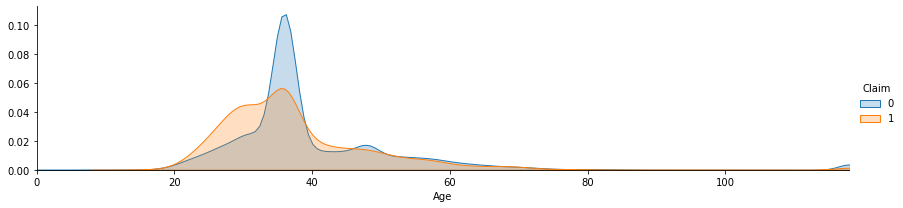

In [31]:
print("Age distribution according to Claim")
facetgrid = sns.FacetGrid(df,hue="Claim",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,df["Age"].max()))
facetgrid.add_legend()
plt.show()

**Convert Destination into numeric**

In [47]:
number=LabelEncoder()
#df['Destination']=number.fit_transform(df['Destination'].astype('str'))
df['Destination']

0              PHILIPPINES
1                 MALAYSIA
2                 THAILAND
3                HONG KONG
4                 MALAYSIA
               ...        
52305            SINGAPORE
52306    BRUNEI DARUSSALAM
52307            SINGAPORE
52308             THAILAND
52309            SINGAPORE
Name: Destination, Length: 52298, dtype: object

In [48]:
#df['Product Name']=number.fit_transform(df['Product Name'].astype('str'))
df['Product Name']

0                      Cancellation Plan
1                      Cancellation Plan
2        Rental Vehicle Excess Insurance
3               2 way Comprehensive Plan
4               2 way Comprehensive Plan
                      ...               
52305                   Annual Gold Plan
52306                         Value Plan
52307                        Bronze Plan
52308                  Cancellation Plan
52309                 Annual Silver Plan
Name: Product Name, Length: 52298, dtype: object

In [49]:
df['Destination'].sort_values(ascending=False).value_counts()

SINGAPORE       14230
THAILAND         4562
MALAYSIA         4359
CHINA            3909
AUSTRALIA        3011
                ...  
BELARUS             2
BHUTAN              2
BERMUDA             2
ZAMBIA              1
TURKMENISTAN        1
Name: Destination, Length: 97, dtype: int64

**Check destination where people applied more**

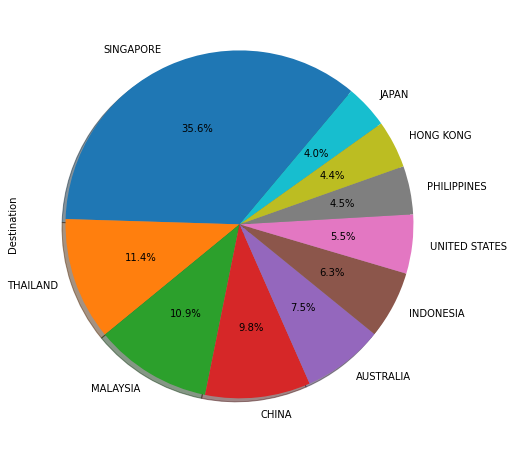

In [4]:
plt.rcParams['figure.figsize']=(10,8)
#color = ['yellowgreen','gold',"lightskyblue"]
df['Destination'].sort_values(ascending=False).value_counts()[:10].plot.pie(label="Destination",startangle=50,shadow=True,autopct="%0.1f%%")
plt.axis('on');

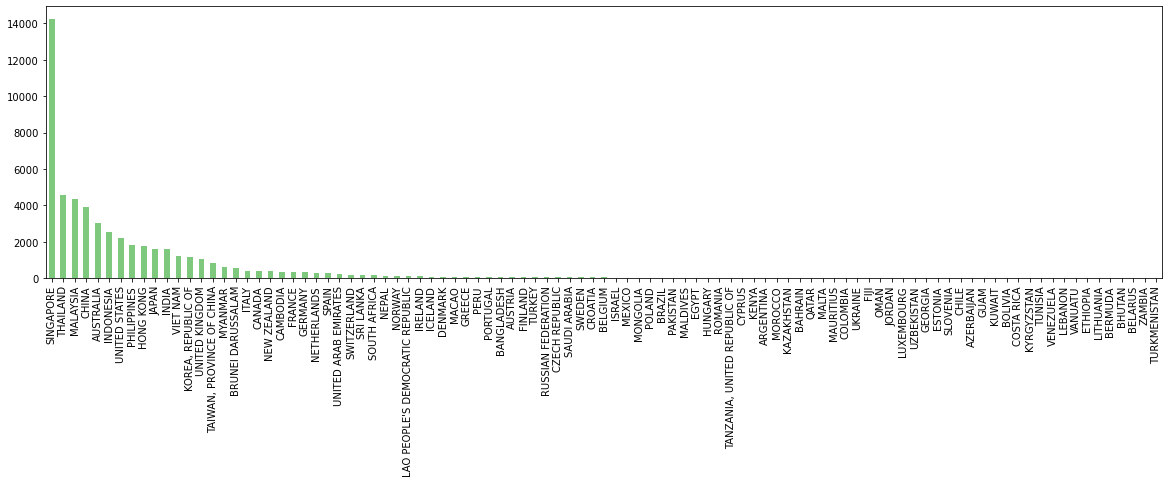

In [33]:
df['Destination'].sort_values(ascending=False).value_counts().plot(kind='bar',cmap='Accent',figsize=(20,5))

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


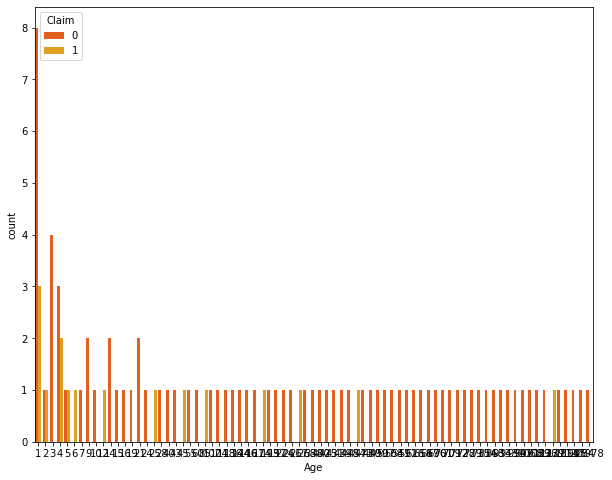

In [52]:
sns.countplot(df['Age'].sort_values(ascending=False).value_counts(),hue=df['Claim'],palette='autumn');

Correlation matrix-


<AxesSubplot:>

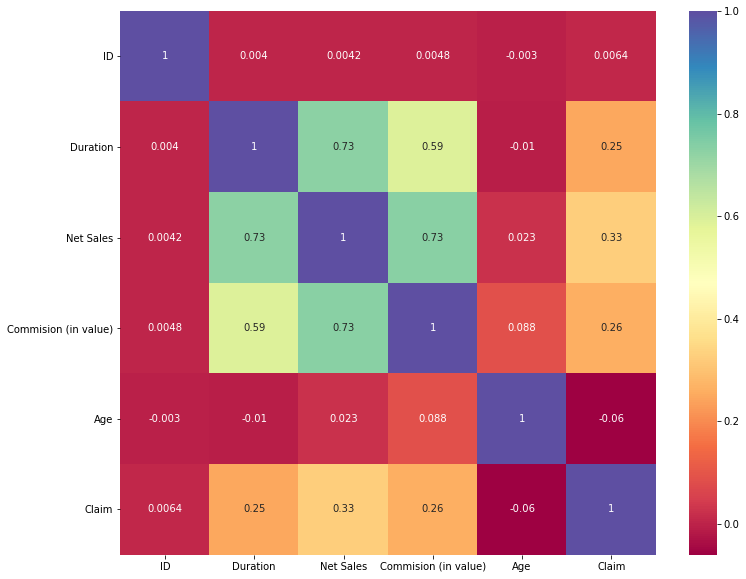

In [34]:
plt.figure(figsize=(12,10))
print("Correlation matrix-")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='Spectral',annot = True)

In [5]:
df.corr()['Claim'].sort_values()

Age                    -0.060228
ID                      0.006393
Duration                0.201583
Commision (in value)    0.258688
Net Sales               0.326799
Claim                   1.000000
Name: Claim, dtype: float64

In [4]:
#creating a checkpoint
df1 = df.copy()
#dropping Vintage and id columns as suggested by EDA
df1.drop(['ID','Commision (in value)','Net Sales','Agency','Agency Type','Distribution Channel'],axis=1,inplace=True)
#checking target variable
df1.Claim.value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

In [5]:
df1.head()

,Product Name,Duration,Destination,Age,Claim
0,Cancellation Plan,61,PHILIPPINES,41,0
1,Cancellation Plan,4,MALAYSIA,35,0
2,Rental Vehicle Excess Insurance,26,THAILAND,47,0
3,2 way Comprehensive Plan,15,HONG KONG,48,0
4,2 way Comprehensive Plan,15,MALAYSIA,36,0


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\91900\\anaconda3\\Lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
# predictors
X = df1.drop(['Claim'], axis = 1)

# target variables
y = df1['Claim']
#X = df1.iloc[:, :11].values
#y = df1.iloc[:, -1].values

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [7]:
df1.columns

Index(['Product Name', 'Duration', 'Destination', 'Age', 'Claim'], dtype='object')

In [8]:
train = pd.get_dummies(data = X_train,columns=['Product Name','Destination'],drop_first = True)

test = pd.get_dummies(data = X_test,columns=['Product Name','Destination'],drop_first = True)

In [9]:
#combining train features and target
df3 = pd.concat([train,y_train],axis=1)

# separating the two classes
df_majority = df3[df3['Claim']==0]
df_minority = df3[df3['Claim']==1]

# upsample the minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y_train.value_counts()[0],random_state = 10)

# Combine the two class data and check for the valu counts of each class
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Claim.value_counts()

1    34843
0    34843
Name: Claim, dtype: int64

In [10]:
X_train = balanced_df.drop('Claim',1)
y_train = balanced_df['Claim']

In [11]:
X_train.isnull().sum()

Duration                                 0
Age                                      0
Product Name_2 way Comprehensive Plan    0
Product Name_24 Protect                  0
Product Name_Annual Gold Plan            0
                                        ..
Destination_UZBEKISTAN                   0
Destination_VANUATU                      0
Destination_VENEZUELA                    0
Destination_VIET NAM                     0
Destination_ZAMBIA                       0
Length: 122, dtype: int64

In [13]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

# predict values
predictions = logisticRegression.predict(test)

# printing the accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

ValueError: could not convert string to float: '2 way Comprehensive Plan'

In [85]:
print(classification_report(y_test,predictions))

ValueError: Found input variables with inconsistent numbers of samples: [10460, 28764]

In [81]:
# initialize the logistic regression model
logisticRegression = LogisticRegression()

# fit the data
logisticRegression.fit(train, y_train)

# find out the predictions
predictions = logisticRegression.predict(test)

# print accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

# logisticRegression.score(y_test,predictions)

C:\Users\91900\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 110 features per sample; expecting 121

In [45]:
logisticRegression.predict(test)

ValueError: X has 110 features per sample; expecting 121

In [ ]:
# fit the model
logisticRegression.fit(X_train, y_train)

# predict values
predictions = logisticRegression.predict(test)

# printing the accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#combining train features and target
dfCon = pd.concat([train,y_train],axis=1)

# separating the two classes
df_majority = dfCon[dfCon['Claim']==0]
df_minority = dfCon[dfCon['Claim']==1]

# upsample the minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y_train.value_counts()[0],random_state = 123)

# Combine the two class data and check for the valu counts of each class
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Claim.value_counts()

In [ ]:
X_train = balanced_df.drop('Claim',1)
y_train = balanced_df['Claim']

In [ ]:
X_train.isnull().sum()

In [ ]:
# fit the model
logisticRegression.fit(X_train, y_train)

# predict values
predictions = logisticRegression.predict(test)

# printing the accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model3 = LogisticRegression()
# knn
model4 = KNeighborsClassifier(n_neighbors=4)

# fit model
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# predict probabilities
pred_prob3 = model1.predict_proba(X_test)
pred_prob4 = model2.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr1, p_tpr1, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr1, p_tpr1, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
number=LabelEncoder()
data['Destination']=number.fit_transform(data['Destination'].astype('str'))
data['Destination']

In [ ]:
number=LabelEncoder()
data['Product Name']=number.fit_transform(data['Product Name'].astype('str'))
data['Product Name']

In [10]:
#creating a checkpoint
df2 = df.copy()
#dropping Vintage and id columns as suggested by EDA
df2.drop(['ID','Commision (in value)','Net Sales','Agency','Agency Type','Distribution Channel'],axis=1,inplace=True)
#checking target variable
df2.head()

,Product Name,Duration,Destination,Age,Claim
0,Cancellation Plan,61,PHILIPPINES,41,0
1,Cancellation Plan,4,MALAYSIA,35,0
2,Rental Vehicle Excess Insurance,26,THAILAND,47,0
3,2 way Comprehensive Plan,15,HONG KONG,48,0
4,2 way Comprehensive Plan,15,MALAYSIA,36,0


In [11]:
# predictors
X = df2.drop(['Claim'], axis = 1)


# target variables
y = df2['Claim']

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [14]:
# fit the model
logisticRegression.fit(X_train, y_train)

# predict values
predictions = logisticRegression.predict(test)

# printing the accuracy and auc_roc score
#rint(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

ValueError: could not convert string to float: '2 way Comprehensive Plan'

In [ ]:
y_test.value_counts().sum()

In [ ]:
list(df.Agency.value_counts().nlargest(5).keys())

In [ ]:
AgencyClaim=df[['Agency','Claim']]

In [ ]:
list(AgencyClaim['Agency'])[:5]

In [ ]:
list(AgencyClaim['Claim'])[:5]

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(list(AgencyClaim['Claim'])[:5],list(AgencyClaim['Agency'])[:5])
plt.title('Top 5 agencies')
plt.xlabel(' agencies')
plt.ylabel('Number of theagencies')
           
plt.show()

In [ ]:
df.Agency.unique()

In [ ]:
df['Product Name'].unique()

In [ ]:
df['Agency Type'].unique()

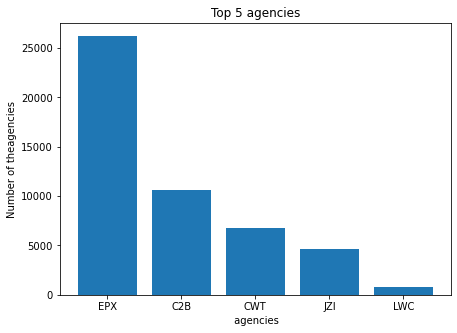

In [7]:
plt.figure(figsize=(7,5))
plt.bar(list(df.Agency.value_counts().nlargest(5).keys()),list(df.Agency.value_counts().nlargest(5)))
plt.title('Top 5 agencies')
plt.xlabel(' agencies')
plt.ylabel('Number of theagencies')
           
plt.show()

In [16]:
df_example = df2[['Age', 'Destination', 'Claim']]

In [8]:
df1.columns

Index(['Product Name', 'Duration', 'Destination', 'Age', 'Claim'], dtype='object')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_example[['Age', 'Destination']],
                                                    df['Claim'], test_size = 0.2,stratify = df['Claim'],
                                                    random_state = 101)

In [18]:
#Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC
#Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are.
#In this case, 'IsActiveMember' is positioned in the second column we input [1] as the parameter. If you have more than one
#categorical columns, just input all the columns position
#cat_col_index = list(range(len('Destination'),59))
#Instantiate SMOTENC algorith with 60% oversampling
#smotenc = SMOTENC(categorical_features=cat_col_index, random_state=101, sampling_strategy=.6)
#X_trainres, y_trainres = smotenc.fit_resample(X_train, y_train)
smotenc = SMOTENC(categorical_features=[1],random_state = 101)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

In [19]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_test, classifier.predict(X_test)))

ValueError: could not convert string to float: 'SINGAPORE'

In [22]:
#creating a checkpoint
dfl = df.copy()
#dropping Vintage and id columns as suggested by EDA
dfl.drop(['ID','Commision (in value)','Net Sales','Agency','Agency Type','Distribution Channel','Age'],axis=1,inplace=True)
#checking target variable
dfl.Claim.value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

In [23]:
# predictors
X = dfl.drop(['Claim'], axis = 1)

# target variables
y = dfl['Claim']
#X = df1.iloc[:, :

In [24]:
enc=LabelEncoder()
X.loc[:,['Product Name','Destination']]= \
X.loc[:,['Product Name','Destination']].apply(enc.fit_transform)
X.head()

,Product Name,Duration,Destination
0,10,61,68
1,10,4,53
2,16,26,84
3,1,15,33
4,1,15,53


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [26]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

# predict values
predictions = logisticRegression.predict(X_test)

# printing the accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

Accuracy score is 83.0
ROC-AUC score is 51.0


In [27]:
print(classification_report(y_test, logisticRegression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      8747
           1       0.43      0.03      0.06      1715

    accuracy                           0.83     10462
   macro avg       0.63      0.51      0.49     10462
weighted avg       0.77      0.83      0.77     10462



In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [29]:

logisticRegression.fit(X_oversample, y_oversample)
Y_predictions = logisticRegression.predict(X_test)
print(accuracy_score(y_test,Y_predictions))
pd.crosstab(y_test,Y_predictions)
print(classification_report(y_test, logisticRegression.predict(X_test)))

0.6771171860064997
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      8747
           1       0.27      0.57      0.37      1715

    accuracy                           0.68     10462
   macro avg       0.58      0.64      0.58     10462
weighted avg       0.79      0.68      0.72     10462



In [102]:
pd.crosstab(y_test,Y_predictions)

col_0,0,1
Claim,,
0,6042,2705
1,679,1036


In [84]:
list(y.reset_index())

['index', 'Claim']

In [40]:
sampledata=y.reset_index()

indexdata=list(sampledata['index'])
sampledata1=list(sampledata['index'])
sampledata1

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [103]:
print(accuracy_score(y_test,logisticRegression.predict(X_test)))

0.6765436818963869


In [30]:
from collections import Counter
print("Before Smote :",Counter(y_train))
print("After Smote :",Counter(y_oversample))

Before Smote : Counter({0: 34843, 1: 7005})
After Smote : Counter({0: 34843, 1: 34843})


In [85]:

smote = SMOTE(random_state = 10)
X_oversample1, y_oversample1 = smote.fit_resample(X_train, y_train)

In [34]:
#creating a checkpoint
test_df = test_data.copy()
#dropping Vintage and id columns as suggested by EDA
test_df.drop(['ID','Commision (in value)','Net Sales','Agency','Agency Type','Distribution Channel','Age'],axis=1,inplace=True)
#checking target variable
test_df.head()

,Product Name,Duration,Destination
0,Cancellation Plan,192,HONG KONG
1,1 way Comprehensive Plan,2,SINGAPORE
2,Bronze Plan,13,SINGAPORE
3,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA"
4,Silver Plan,2,SINGAPORE


In [35]:
enc=LabelEncoder()
test_df.loc[:,['Product Name','Destination']]= \
test_df.loc[:,['Product Name','Destination']].apply(enc.fit_transform)
test_df.head()

,Product Name,Duration,Destination
0,10,192,33
1,0,2,75
2,9,13,75
3,1,133,82
4,17,2,75


In [108]:
X_train

,Product Name,Duration,Destination,Age
6855,1,14,84,36
23989,10,17,37,45
15700,24,2,12,53
18455,9,7,75,26
32523,4,378,75,28
...,...,...,...,...
28017,8,12,33,52
50496,9,34,75,32
29199,0,2,75,35
40061,1,12,84,43


In [15]:

logisticRegression.fit(X_train, y_train)

# predict values
predictions = logisticRegression.predict(test_df)

# printing the accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

ValueError: Found input variables with inconsistent numbers of samples: [10462, 22421]

In [36]:
predictions = logisticRegression.predict(test_df)
len(list(predictions))

22421

In [21]:
 
pd.DataFrame(predictions).to_csv("../file.csv")

In [71]:
submission_file = pd.DataFrame(predictions,index = df_ID,columns = ['Claim'])

NameError: name 'df_ID' is not defined